In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import imutils

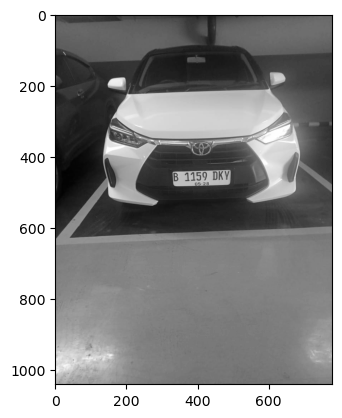

In [2]:
image = cv2.imread('mobil.jpeg')
rows, columns, _ = image.shape

if columns > 1000:
    ratio = columns / 1000
    new_width = int(columns / ratio)
    new_height = int(rows / ratio)
    image = cv2.resize(image, (new_width, new_height))

cv2.waitKey(0)
cv2.destroyAllWindows()

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')

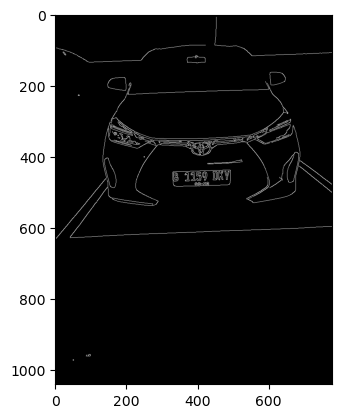

In [3]:
b_filter = cv2.bilateralFilter(gray, 11, 17, 17)
edged = cv2.Canny(b_filter, 30, 200)
plt.imshow(edged, cmap='gray')

In [4]:
key_point = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(key_point)
contours = sorted(contours, key = cv2.contourArea, reverse = True)[:10]

In [5]:


location = None
for contour in contours :
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break



In [6]:
location

array([[[492, 439]],

       [[331, 443]],

       [[331, 476]],

       [[484, 480]]], dtype=int32)

In [7]:


mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0, 255, -1)
new_image = cv2.bitwise_and(image, image, mask=mask)



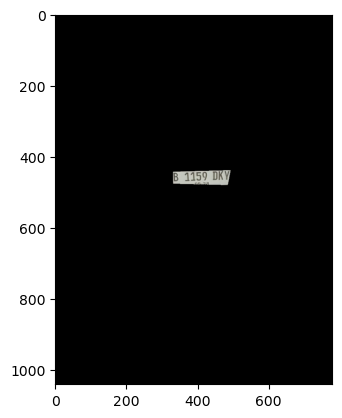

In [8]:
plt.imshow(new_image, cmap='gray')

In [9]:
x, y = np.where(mask == 255)
x1, y1 = np.min(x), np.min(y)
x2, y2 = np.max(x), np.max(y)
cropped_image = gray[x1:x2 + 1, y1:y2 +1]

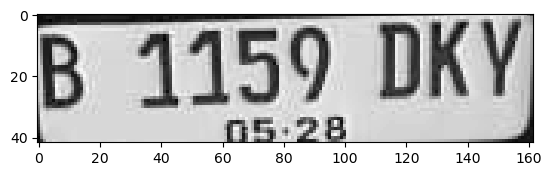

In [10]:
plt.imshow(cropped_image, cmap='gray')